<a href="https://colab.research.google.com/github/Totocsy/Cnn_mnist_numbers/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

print("TensorFlow Version:", tf.__version__)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

CLASS_NAMES = [str(i) for i in range(10)]

TensorFlow Version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



--- Data Structure Check ---
Training Images Shape: (60000, 28, 28)
Test Images Shape: (10000, 28, 28)
Number of classes: 10




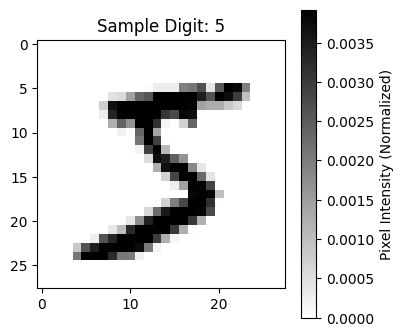

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print("\n--- Data Structure Check ---")
print(f"Training Images Shape: {train_images.shape}")
print(f"Test Images Shape: {test_images.shape}")
print(f"Number of classes: {len(CLASS_NAMES)}")
print("\n")

sample_index = 0
plt.figure(figsize=(4, 4))
plt.imshow(train_images[sample_index], cmap=plt.cm.binary)
plt.title(f"Sample Digit: {CLASS_NAMES[train_labels[sample_index]]}")
plt.colorbar(label='Pixel Intensity (Normalized)')
plt.grid(False)
plt.show()

In [ ]:
INPUT_SHAPE = (28, 28)
HIDDEN_UNITS = 128
OUTPUT_CLASSES = 10


model = Sequential([
    Input(shape=INPUT_SHAPE),
    Flatten(name="Input_Layer_Flatten"),
    Dense(HIDDEN_UNITS, activation='relu', name="Hidden_Layer_1"),
    Dense(OUTPUT_CLASSES, activation='softmax', name="Output_Layer")
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 8
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.1

print(f"Epochs: {EPOCHS}, Batch Size: {BATCH_SIZE}, Validation Split: {VALIDATION_SPLIT}")

Epochs: 8, Batch Size: 32, Validation Split: 0.1


In [ ]:
print("\n   Training Model  : \n ")

history = model.fit(train_images,
                    train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT)


   Training Model  : 
 
Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8718 - loss: 0.4535 - val_accuracy: 0.9655 - val_loss: 0.1202
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9613 - loss: 0.1278 - val_accuracy: 0.9703 - val_loss: 0.0990
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9756 - loss: 0.0810 - val_accuracy: 0.9763 - val_loss: 0.0820
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0580 - val_accuracy: 0.9792 - val_loss: 0.0774
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0472 - val_accuracy: 0.9797 - val_loss: 0.0769
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9777 - val_loss: 0.0840
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9782 - val_loss: 0.0910
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 

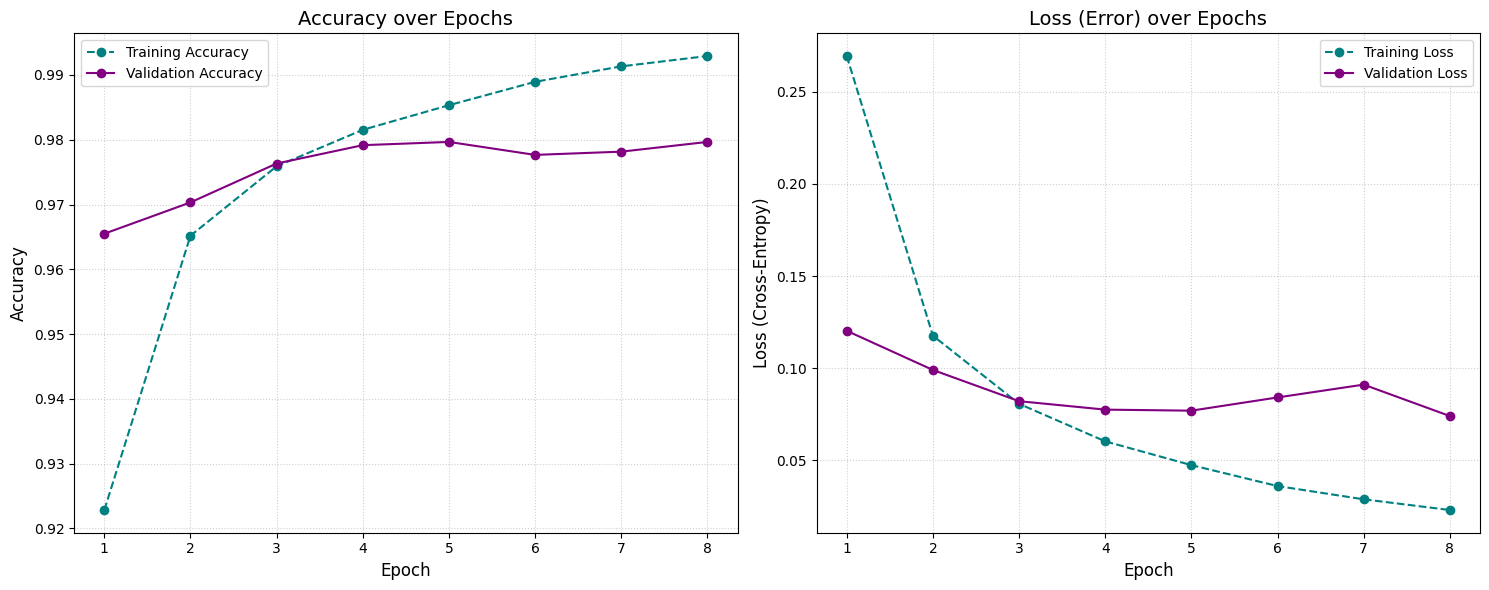

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_df.epoch, hist_df.accuracy, label='Training Accuracy', color='teal', marker='o', linestyle='--')
plt.plot(hist_df.epoch, hist_df.val_accuracy, label='Validation Accuracy', color='purple', marker='o')
plt.title('Accuracy over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(hist_df.epoch, hist_df.loss, label='Training Loss', color='teal', marker='o', linestyle='--')
plt.plot(hist_df.epoch, hist_df.val_loss, label='Validation Loss', color='purple', marker='o')
plt.title('Loss (Error) over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Cross-Entropy)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

Test Loss: 0.0710
Test Accuracy (Precizie Finala): 97.92%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Predictions Analysis (Top 5 Samples):


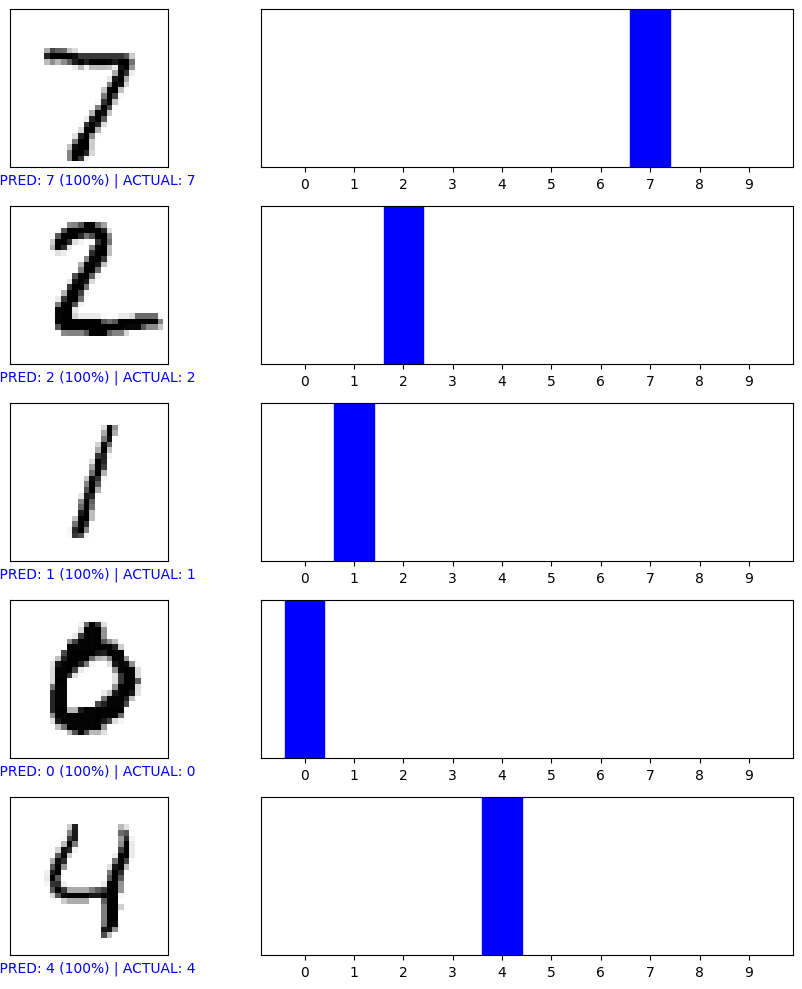

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy (Precizie Finala): {test_acc*100:.2f}%')
predictions = model.predict(test_images)


def plot_image(index, prediction_array, true_label, image, ax):
  pred_array, true_label, img = prediction_array[index], true_label[index], image[index]

  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)

  color = 'blue' if predicted_label == true_label else 'red'

  ax.set_xlabel("    PRED: {} ({:2.0f}%) | ACTUAL: {}".format(CLASS_NAMES[predicted_label],
                                100*np.max(pred_array),
                                CLASS_NAMES[true_label]),
                                color=color)

def plot_value_array(index, prediction_array, true_label, ax):
  pred_array, true_label = prediction_array[index], true_label[index]

  ax.grid(False)
  ax.set_xticks(range(10))
  ax.set_yticks([])
  ax.set_ylim([0, 1])

  thisplot = ax.bar(range(10), pred_array, color="#777777")

  predicted_label = np.argmax(pred_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


NUM_SAMPLES = 5
print(f"\nModel Predictions Analysis (Top {NUM_SAMPLES} Samples):")
plt.figure(figsize=(2 * 5, 2 * NUM_SAMPLES))

for i in range(NUM_SAMPLES):
    ax1 = plt.subplot(NUM_SAMPLES, 2, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images, ax1)

    ax2 = plt.subplot(NUM_SAMPLES, 2, 2 * i + 2)
    plot_value_array(i, predictions, test_labels, ax2)

plt.tight_layout()
plt.show()